<a href="https://colab.research.google.com/github/abdinegara783/ML-Mentoring-Platform-Dicoding/blob/main/Recommender_System_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [16]:
import pandas as pd

In [17]:
mentor=pd.read_csv('mentors.csv')
mentor.head(5)

,name,company,user_headline,review_at,occupation,last_education,profile
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk.",External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,NaN,<ul><li>Bangkit Graduate 2021 - Android Learni...
1,Abdul Chathil,University of Muhammadiyah Malang,Mobile Developer at Bhinneka.com,Memulai Pemrograman Dengan Swift,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,<ul><li>Associate Android Developer</li><li>Mo...
2,Abdul Malik,SMK Media Informatika,Self-employed,Menjadi React Web Developer Expert\nBelajar Me...,Belum/Tidak Bekerja,DIPLOMA_IV_OR_STRATA_I,<p>A self-taught <strong>Frontend Developer</s...
3,Abraham Bulyan Zebua,Pharmaniaga,make something from nothing,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,DIPLOMA_IV_OR_STRATA_I,<p>I love design and make new things especiall...
4,Abrar Wiryawan,Universitas Negeri Jakarta,External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,<ul><li>Android Enthusiast</li><li>Kotlin Enth...


In [18]:
mentor['occupation'].unique()

array(['Android Developer', 'Pelajar/Mahasiswa', 'Belum/Tidak Bekerja',
       'Wirausaha/Entrepreneur/Founder', 'Peneliti',
       'Front-End Developer', 'Data Scientist', 'Programmer',
       'Mobile Apps Developer', 'Software Engineer', 'Karyawan Swasta',
       'Lainnya', 'Dosen', 'DevOps', 'Back-End Developer',
       'Full-Stack Developer', 'Chief Technical Officers (CTO)',
       'Web Engineer', 'UI/UX Designer', 'Web Developer',
       'Cloud Engineer', 'Data Engineer', 'Pekerja Lepas / Freelance',
       'Karyawan Honorer', 'Guru', 'Pegawai Negeri Sipil',
       'Quality Assurance (QA)', 'Data Analyst',
       'Chief Information Officers (CIO)', 'Konsultan'], dtype=object)

In [19]:
mentees=pd.read_csv('mentees.csv')
mentees.head(5)

,Name,course_enrolled,course_graduated
0,hafizhan shidqi,Belajar Membangun LINE Chatbot,Belajar Membangun LINE Chatbot
1,gandhi wibowo,Belajar Membuat Aplikasi Android untuk Pemula\...,"Belajar Membuat Aplikasi Android untuk Pemula,..."
2,aldio mahendra purwandrarto,Belajar Membuat Augmented Reality,Belajar Membuat Augmented Reality
3,benny putra,Menjadi Azure Cloud Developer,Menjadi Azure Cloud Developer
4,vicky vernando dasta,Belajar Membangun LINE Chatbot\nBelajar Dasar ...,"Belajar Membangun LINE Chatbot,Belajar Dasar P..."


# Preprocessing Data Mentor

In [20]:
from bs4 import BeautifulSoup

def remove_html_tags(data, column):
    data[column] = data[column].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text() if isinstance(x, str) else x)
    return data

# Mengisi nilai NaN dengan string kosong
mentor['profile'] = mentor['profile'].fillna('')

# Memanggil fungsi untuk menghilangkan tag HTML pada kolom "profile"
mentor = remove_html_tags(mentor, 'profile')

# Menampilkan hasil
print(mentor)


                        name                            company  \
0         Abdan Zaki Alifian   PT. Bank MNC Internasional, Tbk.   
1              Abdul Chathil  University of Muhammadiyah Malang   
2                Abdul Malik              SMK Media Informatika   
3       Abraham Bulyan Zebua                        Pharmaniaga   
4             Abrar Wiryawan         Universitas Negeri Jakarta   
..                       ...                                ...   
158  Yusril Adriansyah Putra        Universitas Negeri Surabaya   
159             Yusuf Fazeri                         Karyakarsa   
160   Zanuar Ekaputra Rus'an                 Dicoding Indonesia   
161       Zidni Rif'an Ifana      PT Solusi Konvergen Indonesia   
162        Zulfikar Mauludin                                BWA   

                                         user_headline  \
0         External Code Reviewer at Dicoding Indonesia   
1                     Mobile Developer at Bhinneka.com   
2                    

In [21]:
mentor['name']

,name,company,user_headline,review_at,occupation,last_education,profile
0,Abdan Zaki Alifian,"PT. Bank MNC Internasional, Tbk.",External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,NaN,Bangkit Graduate 2021 - Android Learning PathD...
1,Abdul Chathil,University of Muhammadiyah Malang,Mobile Developer at Bhinneka.com,Memulai Pemrograman Dengan Swift,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,Associate Android DeveloperMobile EnthusiastDi...
2,Abdul Malik,SMK Media Informatika,Self-employed,Menjadi React Web Developer Expert\nBelajar Me...,Belum/Tidak Bekerja,DIPLOMA_IV_OR_STRATA_I,A self-taught Frontend Developer with a passio...
3,Abraham Bulyan Zebua,Pharmaniaga,make something from nothing,Belajar Membuat Aplikasi Android untuk Pemula\...,Android Developer,DIPLOMA_IV_OR_STRATA_I,I love design and make new things especially f...
4,Abrar Wiryawan,Universitas Negeri Jakarta,External Code Reviewer at Dicoding Indonesia,Belajar Membuat Aplikasi Android untuk Pemula\...,Pelajar/Mahasiswa,DIPLOMA_IV_OR_STRATA_I,Android EnthusiastKotlin EnthusiastJetpack Com...
...,...,...,...,...,...,...,...
158,Yusril Adriansyah Putra,Universitas Negeri Surabaya,External Code Reviewer at Dicoding Indonesia,Menjadi Front-End Web Developer Expert\nBelaja...,Back-End Developer,DIPLOMA_IV_OR_STRATA_I,Front-End Web DeveloperBack-End Web DeveloperJ...
159,Yusuf Fazeri,Karyakarsa,Instructor at Codepolitan,Belajar Membuat Website untuk Menjadi Desainer...,Web Developer,DIPLOMA_IV_OR_STRATA_I,Sering terlibat dalam pelatihan sebagai mentor...
160,Zanuar Ekaputra Rus'an,Dicoding Indonesia,"Software Engineer, Reviewer at Dicoding Indonesia",Belajar Pengembangan Machine Learning\nBelajar...,Software Engineer,DIPLOMA_IV_OR_STRATA_I,Multi-stack Engineer.Certified TensorFlow Deve...
161,Zidni Rif'an Ifana,PT Solusi Konvergen Indonesia,External Code Reviewer at Dicoding Indonesia,Belajar Fundamental Aplikasi Back-End\nBelajar...,Back-End Developer,DIPLOMA_IV_OR_STRATA_I,Backend Developer


In [22]:
def check_missing_values(data):
    missing_values = data.isnull().sum()
    total_values = data.shape[0]
    missing_percentage = (missing_values / total_values) * 100

    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Total Values': total_values,
        'Missing Percentage': missing_percentage
    })

    return missing_data

# Contoh penggunaan
missing_data = check_missing_values(mentor)
print(missing_data)


                Missing Values  Total Values  Missing Percentage
name                         0           163            0.000000
company                      2           163            1.226994
user_headline               13           163            7.975460
review_at                    0           163            0.000000
occupation                   0           163            0.000000
last_education               2           163            1.226994
profile                      0           163            0.000000


In [23]:
import pandas as pd

def get_missing_values(data):
    missing_columns = data.columns[data.isnull().any()].tolist()
    missing_rows = data[data.isnull().any(axis=1)]

    return missing_columns, missing_rows

# Contoh penggunaan
missing_columns, missing_rows = get_missing_values(mentor)
print("Columns with missing values:", missing_columns)
print("\nRows with missing values:")
print(missing_rows)


Columns with missing values: ['company', 'user_headline', 'last_education']

Rows with missing values:
                                 name  \
0                  Abdan Zaki Alifian   
5                    Adam Ardisasmita   
22               Amril Hakim Sihotang   
23                 Ananda Dwi Prayoga   
38                  Celvine Adi Putra   
53                     Faisal Susanto   
62             GALIH INDRA FIRMANSYAH   
65   Gusti Muhammad Aulia Nur Sulthan   
77                      Kamal Mahmudi   
81         Khrisna Indrawan Eka Putra   
100   Muhammad Hadi Selamet Hariyanto   
102              Muhammad Ilham Adhim   
109                    Nanang Sutisna   
111            Ni Luh Putu Anita Dewi   
112              Ni Made Yuli Cahyani   
125               Rangga Eki Syahrial   
153             Widyarso Joko Purnomo   

                                               company  \
0                     PT. Bank MNC Internasional, Tbk.   
5                                         

Dari sini, kita akan membuat sebuah feature baru berupa feature "preferensi" merupakan gabungan dari beberapa feature untuk menemukan kecocokan

In [25]:
mentor['preferensi'] = mentor[['company', 'user_headline', 'review_at', 'occupation', 'profile']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [27]:
df_mentor = mentor[['name','preferensi']]

In [28]:
df_mentor.shape

(163, 2)

In [1]:
import nltk
nltk.download('stopwords')

nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

class Mentee:
    def __init__(self, name, needs):
        self.name = name
        self.needs = needs

class Mentor:
    def __init__(self, name, expertise):
        self.name = name
        self.expertise = expertise

class MentoringPlatform:
    def __init__(self):
        self.mentees = []
        self.mentors = []
        self.vectorizer = TfidfVectorizer()

    def add_mentee(self, mentee):
        self.mentees.append(mentee)

    def add_mentor(self, mentor):
        self.mentors.append(mentor)

    def preprocess_text(self, text):
        stop_words = set(stopwords.words('english') + stopwords.words('indonesian'))
        tokens = word_tokenize(text.lower())
        filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        preprocessed_text = ' '.join(filtered_tokens)
        return preprocessed_text

    def fit_vectorizer(self):
        corpus = []
        for mentee in self.mentees:
            corpus.append(self.preprocess_text(mentee.needs))
        for mentor in self.mentors:
            corpus.append(self.preprocess_text(mentor.expertise))
        self.vectorizer.fit(corpus)

    def find_mentor(self, mentee):
        mentee_needs = self.preprocess_text(mentee.needs)
        mentee_vector = self.vectorizer.transform([mentee_needs])

        matched_mentors = []
        for mentor in self.mentors:
            mentor_expertise = self.preprocess_text(mentor.expertise)
            mentor_vector = self.vectorizer.transform([mentor_expertise])

            similarity_score = cosine_similarity(mentee_vector, mentor_vector)[0][0]
            if similarity_score > 0:
                matched_mentors.append((mentor, similarity_score))

        matched_mentors = sorted(matched_mentors, key=lambda x: x[1])

        return matched_mentors

# Contoh penggunaan:
platform = MentoringPlatform()

# Menambahkan mentees dan mentors ke platform
mentee1 = Mentee("Mentee 1", "Saya ingin menemukan mentor yang ahli dalam analisis data")
mentee2 = Mentee("Mentee 2", "Saya membutuhkan bimbingan dalam pengembangan front-end")
mentee3 = Mentee("Mentee 3", " I want to looking for a mentor who experience with data analysis")
platform.add_mentee(mentee1)
platform.add_mentee(mentee2)
platform.add_mentee(mentee3)

for index, row in df_mentor.iterrows():
    mentor_expertise = ' '.join(row['preferensi'].split()[:10])  # Mengambil maksimal 10 kata dari mentor.expertise
    mentor = Mentor(row['name'], mentor_expertise)
    platform.add_mentor(mentor)

# Fitting vectorizer
platform.fit_vectorizer()

# Melakukan pencocokan mentee dengan mentor
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        print(f"Mentee '{mentee.name}' cocok dengan mentor:")
        for mentor, similarity_score in matched_mentors:
            print(f"- {mentor.name} ({mentor.expertise}) - Similarity Score: {similarity_score}")
    else:
        print(f"Mentee '{mentee.name}' tidak ditemukan mentor yang cocok.")


Mentee 'Mentee 1' cocok dengan mentor:
- Rama Rahmanda (Feedloop, Software Engineer at Feedloop, Belajar Dasar Visualisasi Data, Software) - Similarity Score: 0.08735658541746409
- Gabril Hozanna (Gojek, Data Warehouse Engineer at Gojek, Belajar Pengembangan Machine Learning) - Similarity Score: 0.09872093053242444
- Celvine Adi Putra (Universitas Multi Data Palembang & Universitas Bina Darma, Menjadi Flutter) - Similarity Score: 0.10516647411669656
- Adrianus Yoza A. (Dicoding, Data Scientist at Dicoding Indonesia, Menjadi Google Cloud Engineer) - Similarity Score: 0.1343768818973865
- Thingkilia Finnatia Husin (Universitas Multi Data Palembang, External Code Reviewer at Dicoding Indonesia,) - Similarity Score: 0.14887978714420097
- Widyarso Joko Purnomo (Dicoding, Pengenalan Data pada Pemrograman (Data 101) Pengenalan ke Logika) - Similarity Score: 0.1820726291191624
Mentee 'Mentee 2' cocok dengan mentor:
- Gusti Muhammad Aulia Nur Sulthan (Universitas Lambung Mangkurat, Belajar Peng

In [14]:
pip install networkx matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mentee 'Mentee 1' cocok dengan mentor:
- Rama Rahmanda (Feedloop, Software Engineer at Feedloop, Belajar Dasar Visualisasi Data, Software) - Similarity Score: 0.08735658541746409
- Gabril Hozanna (Gojek, Data Warehouse Engineer at Gojek, Belajar Pengembangan Machine Learning) - Similarity Score: 0.09872093053242444
- Celvine Adi Putra (Universitas Multi Data Palembang & Universitas Bina Darma, Menjadi Flutter) - Similarity Score: 0.10516647411669656
- Adrianus Yoza A. (Dicoding, Data Scientist at Dicoding Indonesia, Menjadi Google Cloud Engineer) - Similarity Score: 0.1343768818973865
- Thingkilia Finnatia Husin (Universitas Multi Data Palembang, External Code Reviewer at Dicoding Indonesia,) - Similarity Score: 0.14887978714420097
- Widyarso Joko Purnomo (Dicoding, Pengenalan Data pada Pemrograman (Data 101) Pengenalan ke Logika) - Similarity Score: 0.1820726291191624
Mentee 'Mentee 2' cocok dengan mentor:
- Gusti Muhammad Aulia Nur Sulthan (Universitas Lambung Mangkurat, Belajar Peng

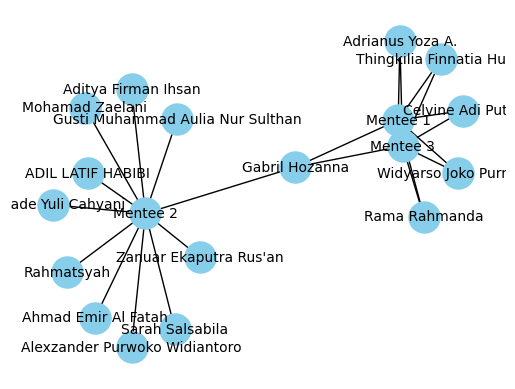

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# ... (previous code remains the same)

# Melakukan pencocokan mentee dengan mentor
graph = nx.Graph()
for mentee in platform.mentees:
    matched_mentors = platform.find_mentor(mentee)
    if len(matched_mentors) > 0:
        print(f"Mentee '{mentee.name}' cocok dengan mentor:")
        for mentor, similarity_score in matched_mentors:
            print(f"- {mentor.name} ({mentor.expertise}) - Similarity Score: {similarity_score}")
            graph.add_edge(mentee.name, mentor.name)
    else:
        print(f"Mentee '{mentee.name}' tidak ditemukan mentor yang cocok.")

# Visualisasi grafik
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=500)
nx.draw_networkx_labels(graph, pos, font_size=10, font_family='sans-serif')
nx.draw_networkx_edges(graph, pos)
plt.axis('off')
plt.show()
